[-869.77899308  822.41855892  708.04736155 -328.08092315 -374.06127178
    1.        ] [[ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]
 [ inf  inf  inf  inf  inf  inf]]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:62: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:62: RuntimeWarning: invalid value encountered in add


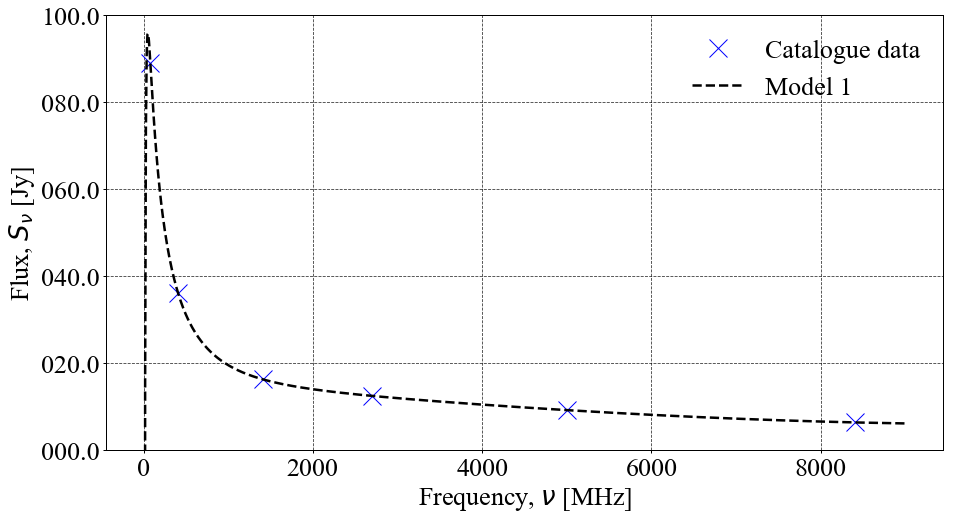

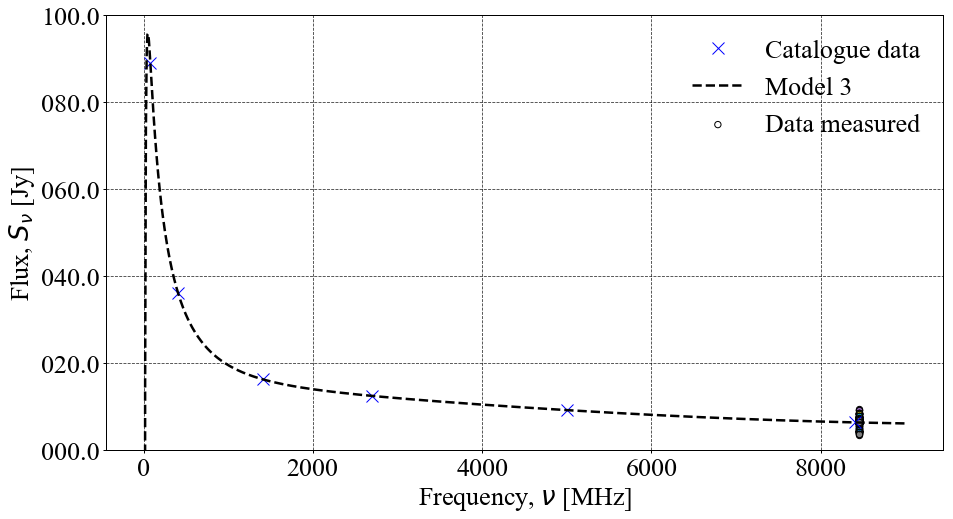

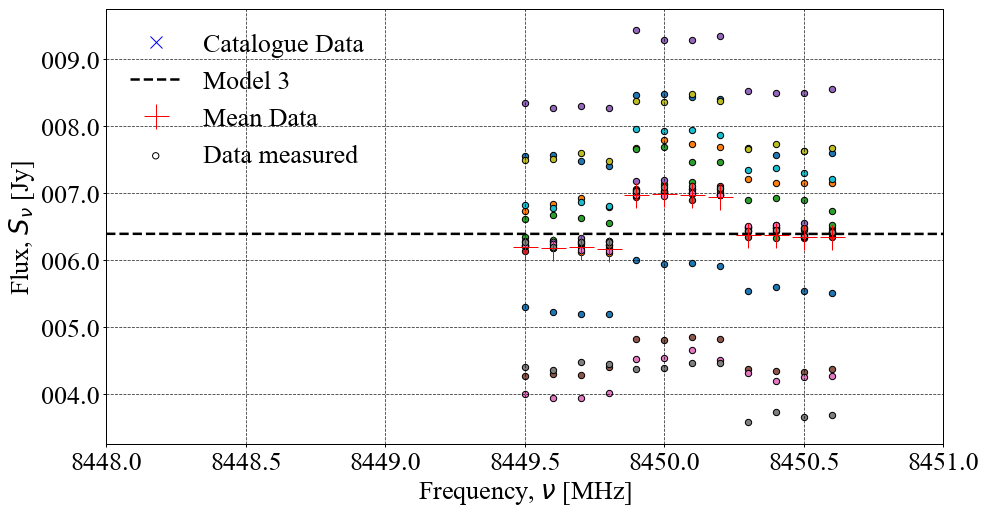

In [2]:
%matplotlib inline
### Model for 1934-638
### Flux density model for 1934-638 from Reynolds 1994
### S=10^(-30.7667 + 26.4908*(np.log10(f)) + 7.0977*(np.log10(f))^2 + 0.605334*(np.log10(f))^3)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import LogLocator, FormatStrFormatter, LinearLocator, FixedLocator
from scipy.optimize import curve_fit
from matplotlib.pylab import rcParams

# set global settings
def init_plotting():
    rcParams['figure.figsize'] = 15,8
    rcParams['font.size'] = 26
    rcParams['font.family'] = 'Times New Roman'
    rcParams['axes.labelsize'] = plt.rcParams['font.size']
    rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    rcParams['legend.fontsize'] = plt.rcParams['font.size']
    rcParams['legend.markerscale'] = 1
    rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    rcParams['xtick.major.size'] = 3
    rcParams['xtick.minor.size'] = 3
    rcParams['xtick.major.width'] = 1
    rcParams['xtick.minor.width'] = 1
    rcParams['ytick.major.size'] = 3
    rcParams['ytick.minor.size'] = 3
    rcParams['ytick.major.width'] = 1
    rcParams['ytick.minor.width'] = 1
    rcParams['legend.frameon'] = False
    rcParams['legend.loc'] = 'center left'
    rcParams['axes.linewidth'] = 1
    rcParams['grid.alpha'] = 0.8 
#     gca().spines['right'].set_color('none')
#     gca().spines['top'].set_color('none')
#     gca().xaxis.set_ticks_position('bottom')
#     gca().yaxis.set_ticks_position('left')

# This looks like a line on a lof-log plot.
def func1(x, a, b):
    return a * np.power(x, b)

def rms(array):
    return np.sqrt(np.mean(np.power(array, 2)))

def func(x, a, b):
    return 10^(a*x+b)

def mean_reject_outliers(data, m=1):
    a=data[abs(data - np.mean(data)) < m * np.std(data)]
    return a.mean()

def fitfunc(x, a, b, c, d, e, f):
    return 10**(a*np.log10(x)**(0)+b*np.log10(x)**(0.5)+c*np.log10(x)**(-1)+d*np.log10(x)**(0.75)+e*np.log10(x)**(-2))

def model2(x):
    return 10**(-869.78+822.42*np.log10(x)**(0.5)+708.05*np.log10(x)**(-1)-328.08*np.log10(x)**(0.75)-374.06*np.log10(x)**(-2))

def model(x):
    return 679.02 - 278.372*np.log10(x)**1 - 631.247*np.log10(x)**-3 + 1.5951*np.log10(x)**5 - 9.6438e-02*np.log10(x)**7+3.7858e-04*np.log10(x)**10

init_plotting()

tickformat = "%05.1f"

fig, ax = plt.subplots()
Fdata=np.array([80,408,1410,2700,5000,8400])
Data =np.array([89,36.1,16.3,12.5,9.23,6.4])
plt.plot(Fdata,Data,label='Catalogue data', marker='x',color='b', linestyle=' ',markersize=18)
plt.grid(b=True, which='major', color='k', linestyle='--')
plt.grid(b=True, which='minor', color='k', linestyle='--')
popt, pcov = curve_fit(fitfunc, Fdata, Data)
# popt2, pcov2 = curve_fit(fitfunc2, Fdata, Data)

print popt,pcov
# print popt2,pcov2

xp = np.linspace(0, 9000,1000)
# plt.plot(xp, fitfunc(xp, *popt), 'g-', label="Fitted Curve")
# plt.plot(xp, fitfunc2(xp, *popt2), 'g-', label="Fitted Curve 2")
plt.plot(xp, model(xp), 'k--', label="Model 1",linewidth=2.5)
# plt.plot(xp, model2(xp), 'b--', label="Model 2")
plt.ylim( 0, 100 )
# plt.title('0521-365')
axes = plt.gca()
axes.yaxis.set_major_formatter(FormatStrFormatter(tickformat))
plt.xlabel(r'Frequency, $\nu$ [MHz]')
plt.ylabel(r'Flux, $S_\nu$ [Jy]')
plt.legend(ncol=1,loc='upper righy')

fig, ax = plt.subplots()
Fdata=np.array([80,408,1410,2700,5000,8400])
Data =np.array([89,36.1,16.3,12.5,9.23,6.4])
plt.plot(Fdata,Data,label='Catalogue data', marker='x',color='b', linestyle=' ',markersize=12)
plt.grid(b=True, which='major', color='k', linestyle='--')
plt.grid(b=True, which='minor', color='k', linestyle='--')
popt, pcov = curve_fit(fitfunc, Fdata, Data)
xp = np.linspace(0, 9000,1000)
# plt.plot(xp, fitfunc(xp, *popt), 'g-', label="Fitted Curve")
plt.plot(xp, model(xp), 'k--', label="Model 3",linewidth=2.5)
# plt.plot(xp, model2(xp), 'b--', label="Fitted Curve Model 2")
plt.ylim( 0, 100 )
axes = plt.gca()
axes.yaxis.set_major_formatter(FormatStrFormatter(tickformat))
# plt.title('0521-365')
plt.xlabel(r'Frequency, $\nu$ [MHz]')
plt.ylabel(r'Flux, $S_\nu$ [Jy]')
plt.legend(ncol=3)

Freq=np.array([8449.5,8449.6,8449.7,8449.8,8449.9,8450.0,8450.1,8450.2,8450.3,8450.4,8450.5,8450.6])
Flux=np.array([
#     [0.17089, 0.26312, 0.3004, 0.28318, 0.32943, 0.35913, 0.31871, 0.20717, 0.28489, 0.20897, 0.28635, 0.32683],
#     [-1.95098, -1.76952, -1.87267, -1.92322, -1.86814, -1.93685, -1.85164, -1.88769, -1.66385, -1.63744, -1.60632, -1.57756],
    [7.56, 7.56758, 7.47864, 7.39726, 8.46525, 8.48031, 8.44002, 8.41013, 7.66653, 7.57482, 7.62407, 7.60082],
    [6.73055, 6.83765, 6.92038, 6.78768, 7.68012, 7.79461, 7.73106, 7.68296, 7.21705, 7.14758, 7.14539, 7.15456],
    [6.60818, 6.67136, 6.62665, 6.55922, 7.65218, 7.68909, 7.46823, 7.46143, 6.8995, 6.92526, 6.90112, 6.72501],
#     [2.36748, 2.479, 2.44675, 2.44707, 2.15115, 1.99326, 2.06528, 2.06175, 1.3859, 1.30355, 1.38599, 1.37472],
    [6.22395, 6.27827, 6.20001, 6.17302, 7.05565, 7.0251, 7.05779, 6.96997, 6.47304, 6.47127, 6.33343, 6.34492],
    [8.33813, 8.27739, 8.29879, 8.2638, 9.42944, 9.28912, 9.28597, 9.34366, 8.51962, 8.4913, 8.48759, 8.55407],
#     [45.64032, 45.65135, 45.62203, 45.54458, 50.97669, 50.7848, 50.86481, 50.75158, 45.58894, 45.44469, 45.62578, 45.51369],
    [4.26929, 4.30189, 4.28649, 4.39655, 4.82421, 4.80758, 4.84936, 4.81386, 4.36351, 4.33972, 4.3314, 4.37773],
    [4.00116, 3.94494, 3.93677, 4.01528, 4.519, 4.52963, 4.65506, 4.50928, 4.30727, 4.19302, 4.24758, 4.26761],
    [4.40482, 4.35261, 4.47673, 4.45041, 4.36983, 4.39059, 4.46697, 4.45575, 3.58561, 3.73422, 3.66119, 3.68823],
    [7.49503, 7.50351, 7.60104, 7.48163, 8.37943, 8.36105, 8.48615, 8.3737, 7.65289, 7.73445, 7.63494, 7.67116],
    [6.82038, 6.78078, 6.85975, 6.79952, 7.95667, 7.92977, 7.93545, 7.86312, 7.34295, 7.36842, 7.29209, 7.20739],
    [5.29822, 5.22054, 5.19802, 5.19425, 6.00097, 5.93656, 5.95438, 5.91227, 5.53833, 5.5997, 5.53647, 5.513],
    [6.21273, 6.22319, 6.12218, 6.09998, 7.01702, 6.99363, 7.01165, 6.9659, 6.43049, 6.52266, 6.48086, 6.47441],
    [6.33853, 6.29415, 6.28999, 6.2778, 7.05118, 7.1347, 7.16835, 7.05882, 6.48962, 6.3329, 6.4421, 6.51776],
    [6.12768, 6.17656, 6.23226, 6.21865, 6.93534, 7.01776, 6.98617, 7.09876, 6.44148, 6.49021, 6.34921, 6.40041],
    [6.20522, 6.26201, 6.3347, 6.28343, 7.18637, 7.18932, 7.06601, 6.98733, 6.49838, 6.4781, 6.55199, 6.43009],
    [6.28062, 6.18593, 6.25394, 6.22384, 6.97776, 7.03307, 6.90087, 7.0165, 6.34655, 6.4353, 6.47944, 6.41846],
    [6.21998, 6.23871, 6.14478, 6.14058, 6.97784, 6.95901, 7.00107, 6.97242, 6.51089, 6.51623, 6.3803, 6.40384],
    [6.26887, 6.1946, 6.26792, 6.26227, 7.02808, 7.0925, 7.10402, 7.07827, 6.43568, 6.45334, 6.35803, 6.41482]])

for i in Flux:
    plt.scatter(Freq,i, edgecolors='k',marker='o', label='',s=40)
plt.scatter([], [], color='k',facecolors='none', edgecolors='k',marker='o', label='Data measured',s=40)

FluxMean=Flux.mean(axis=0)
# print FluxMean

# plt.plot(Freq,Flux.mean(axis=0),label='Average Data', color='k', marker='x', markersize=8, linestyle=' ',alpha=0.2)

plt.grid(b=True, which='major', color='k', linestyle='--')
plt.grid(b=True, which='minor', color='k', linestyle='--',linewidth=2.5)
# plt.title('0521-365')
plt.xlabel(r'Frequency, $\nu$ [MHz]')
plt.ylabel(r'Flux, $S_\nu$ [Jy]')
plt.legend(ncol=1,loc='upper righy')

f1 = np.linspace(8395, 8451, num=100000) 

fig1, bx = plt.subplots()

plt.plot([8400],[6.4],label='Catalogue Data', marker='x',color='b', linestyle=' ',markersize=12)

# plt.plot(f1, fitfunc(f1, *popt), 'g-', label="Fitted Curve")
plt.plot(f1, model(f1), 'k--', label="Model 3",linewidth=2.5)
# plt.plot(f1, model2(f1), 'r--', label="Fitted Curve Model 2")

for i in Flux:
    plt.scatter(Freq,i, edgecolors='k',marker='o', label='',s=40)
plt.scatter([], [], color='k',facecolors='none', edgecolors='k',marker='o', label='Data measured',s=40)
FluxMean=Flux.mean(axis=0)
plt.plot(Freq,Flux.mean(axis=0),label='Mean Data', color='r', marker='+', markersize=25, linestyle=' ')
plt.grid(b=True, which='major', color='k', linestyle='--')
plt.grid(b=True, which='minor', color='k', linestyle='--')
# plt.title('0521-365')
axes = plt.gca()
axes.yaxis.set_major_formatter(FormatStrFormatter(tickformat))
plt.xlim(8448,8451)
plt.xlabel(r'Frequency, $\nu$ [MHz]')
plt.ylabel(r'Flux, $S_\nu$ [Jy]')
plt.legend(ncol=1,loc='upper left')
